In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
accepts = pd.read_csv('accepts.csv',skipinitialspace=True)#忽略分隔符后的空白
accepts.head()#查看前五行数据

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,...,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1,1.00
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,...,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0,4.75
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,...,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1,1.00
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,...,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1,1.00
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,...,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0,4.75


In [4]:
accepts.info()#查看数据字段信息，各种字段的类型和非空数据条数

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 25 columns):
application_id    5845 non-null int64
account_number    5845 non-null int64
bad_ind           5845 non-null int64
vehicle_year      5844 non-null float64
vehicle_make      5546 non-null object
bankruptcy_ind    5628 non-null object
tot_derog         5632 non-null float64
tot_tr            5632 non-null float64
age_oldest_tr     5629 non-null float64
tot_open_tr       4426 non-null float64
tot_rev_tr        5207 non-null float64
tot_rev_debt      5367 non-null float64
tot_rev_line      5367 non-null float64
rev_util          5845 non-null int64
fico_score        5531 non-null float64
purch_price       5845 non-null float64
msrp              5844 non-null float64
down_pyt          5845 non-null float64
loan_term         5845 non-null int64
loan_amt          5845 non-null float64
ltv               5844 non-null float64
tot_income        5840 non-null float64
veh_mileage       5844 no

In [5]:
accepts = accepts.dropna(axis=0,how='any')#删除缺失值

In [6]:
accepts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4105 entries, 0 to 5844
Data columns (total 25 columns):
application_id    4105 non-null int64
account_number    4105 non-null int64
bad_ind           4105 non-null int64
vehicle_year      4105 non-null float64
vehicle_make      4105 non-null object
bankruptcy_ind    4105 non-null object
tot_derog         4105 non-null float64
tot_tr            4105 non-null float64
age_oldest_tr     4105 non-null float64
tot_open_tr       4105 non-null float64
tot_rev_tr        4105 non-null float64
tot_rev_debt      4105 non-null float64
tot_rev_line      4105 non-null float64
rev_util          4105 non-null int64
fico_score        4105 non-null float64
purch_price       4105 non-null float64
msrp              4105 non-null float64
down_pyt          4105 non-null float64
loan_term         4105 non-null int64
loan_amt          4105 non-null float64
ltv               4105 non-null float64
tot_income        4105 non-null float64
veh_mileage       4105 no

In [7]:
#区分自变量和因变量
target = accepts['bad_ind']#是否违约，违约=1，不违约=0
data = accepts.loc[:,'bankruptcy_ind':'used_ind']#选出自变量

In [8]:
data['lti_temp'] = data['loan_amt']/data['tot_income']
#特征工程，生成新特征， 贷款金额/月均收入（元）
data['lti_temp'] = data['lti_temp'].map(lambda x: 10 if x>=10 else x)#限制最大设置为10
del data['loan_amt']#删除原始变量
data['bankruptcy_ind'] = data['bankruptcy_ind'].replace({'N':0,'Y':1})#用01代替原来的值
data.head()

,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,ltv,tot_income,veh_mileage,used_ind,lti_temp
0,0,7.0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,0.00,36,99.0,6550.00,24000.0,1,2.625954
1,0,0.0,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,683.54,60,99.0,4666.67,22.0,0,4.197541
3,0,3.0,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,3099.00,60,118.0,1500.00,10000.0,1,7.200000
4,0,0.0,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,0.00,60,122.0,4144.00,14.0,0,6.353292
5,1,2.0,15.0,136.0,4.0,3.0,3651.0,5747.0,64,680.0,26272.72,26375.0,0.00,36,100.0,5400.00,1.0,0,4.865319


In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data,\
        target, test_size=0.2, train_size=0.8 ,random_state=1234) # 划分训练集和测试集

In [10]:
from sklearn.tree import DecisionTreeClassifier#决策树模型导入

clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=3,#树的最大深度
                             class_weight=None,#类别等权重
                             random_state=1234#随机数种子，为了可重现本次结果
                            )
clf.fit(train_data,train_target)#训练模型

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [11]:
import sklearn.metrics as metrics # 导入机器学习评估模块 

print(metrics.classification_report(test_target, clf.predict(test_data)))  # 计算评估指标

             precision    recall  f1-score   support

          0       0.81      0.94      0.87       648
          1       0.46      0.18      0.26       173

avg / total       0.74      0.78      0.74       821



对于违约=1情况，f1-score只有0.46，召回率只有0.18，说明在违约的用户中，模型只能找出其中的18%，而实际情况是1个违约用户分为正常用户的损失非常大，所以针对违约与否的样本，重要性大有不同，于是将违约用户权重调高。

In [12]:
clf.set_params(**{'class_weight':{0:1,1:5}})#调整违约用户的权重是非违约的5倍
clf.fit(train_data, train_target)#重新训练模型
print(metrics.classification_report(test_target, clf.predict(test_data)))
#给出模型测试结果

             precision    recall  f1-score   support

          0       0.93      0.44      0.60       648
          1       0.30      0.88      0.44       173

avg / total       0.80      0.54      0.57       821



In [13]:
list(zip(data.columns, clf.feature_importances_))#决策树模型的变量重要性输出

[('bankruptcy_ind', 0.0),
 ('tot_derog', 0.0),
 ('tot_tr', 0.0),
 ('age_oldest_tr', 0.0),
 ('tot_open_tr', 0.0),
 ('tot_rev_tr', 0.0),
 ('tot_rev_debt', 0.0),
 ('tot_rev_line', 0.1411481390820729),
 ('rev_util', 0.0),
 ('fico_score', 0.6717862140033523),
 ('purch_price', 0.0),
 ('msrp', 0.0),
 ('down_pyt', 0.0),
 ('loan_term', 0.0),
 ('ltv', 0.18706564691457492),
 ('tot_income', 0.0),
 ('veh_mileage', 0.0),
 ('used_ind', 0.0),
 ('lti_temp', 0.0)]

由上方内容看出，最重要的变量是fico_score，其次是ltv和tot_rev_line，
多数变量在决策树模型中未用到，变量的重要性为0

In [14]:
!pip install pydotplus

You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
import pydotplus

In [16]:
from IPython.display import Image # 导入绘图模块
import sklearn.tree as tree 

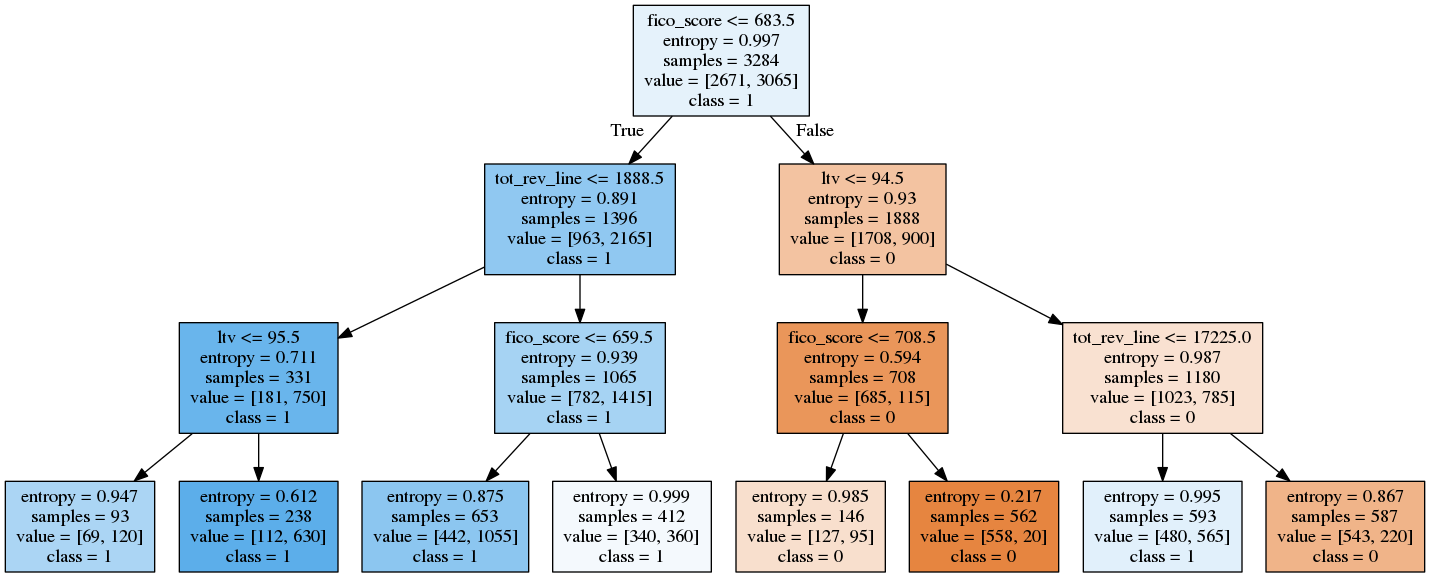

In [17]:
dot_data = tree.export_graphviz(clf, #决策树可视化
                               out_file=None,
                               feature_names=data.columns,
                               class_names=['0','1'],
                               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())#显示决策树

In [18]:
dot_data = tree.export_graphviz(clf,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('tree.pdf')#将树的结果保存在本地pdf中

True

In [19]:
from sklearn.model_selection import ParameterGrid, GridSearchCV
#网格搜索
max_leaf_nodes = np.arange(5,10,1)
#最大叶节点数设置为5~9中搜索
class_weight = [{0:1,1:2}, {0:1,1:3}, {0:1,1:5}]#类别权重为1：2，1：3，1：5中搜索

param_grid = {
              'max_leaf_nodes':max_leaf_nodes,
              'class_weight':class_weight}

clf_cv = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      cv=5, #5折交叉验证
                      scoring='roc_auc')#通过roc auc评估模型
#会构建5*5*3=75个决策树，网格搜索出交叉验证模型评估结果最好的那个模型
clf_cv.fit(train_data, train_target)#训练模型

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 5}, criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': array([5, 6, 7, 8, 9]), 'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 5}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [20]:
print(metrics.classification_report(test_target, clf_cv.predict(test_data)))#模型评估结果

             precision    recall  f1-score   support

          0       0.87      0.77      0.81       648
          1       0.39      0.57      0.46       173

avg / total       0.77      0.72      0.74       821



In [21]:
clf_cv.best_params_#搜索出的最优超参数组合

{'class_weight': {0: 1, 1: 3}, 'max_leaf_nodes': 7}

In [22]:
train_est = clf_cv.predict(train_data)#预测结果为 0 1
train_est_p = clf_cv.predict_proba(train_data)[:,1]#预测结果为0~1之间的概率
test_est = clf_cv.predict(test_data)
test_est_p = clf_cv.predict_proba(test_data)[:,1]

In [23]:
fpr_test, tpr_test, th_test = metrics.roc_curve(test_target, test_est_p)
#算出绘制roc的指标，训练集

In [24]:
fpr_train, tpr_train, th_train = metrics.roc_curve(train_target, train_est_p)
#测试集

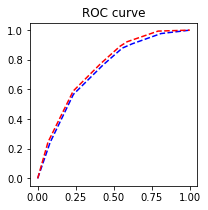

In [25]:
plt.figure(figsize=[3,3])#设置图的大小
plt.plot(fpr_test, tpr_test, 'b--')#绘制测试集roc曲线
plt.plot(fpr_train, tpr_train, 'r--')#绘制训练集roc曲线
plt.title('ROC curve')#设置标题
plt.show()#显示图

In [26]:
#训练集和测试集的roc很接近，说明没有过拟合

In [27]:
print(metrics.roc_auc_score(test_target, test_est_p))#AUC的值

0.7294565760365375
